## Data Preprocessing

In [1]:
source('../src/util.r')
source('../src/multiplot.r')

### Read in and merge the data files into one data frame

In [2]:
zoning_df = read.csv('../data/zoning.csv')
listing_df = read.csv('../data/listing.csv')
sale_df = read.csv('../data/sale.csv')

In [3]:
ames_housing_df = merge(zoning_df, listing_df, by="Id")
ames_housing_df = merge(ames_housing_df, sale_df, by="Id")

### Remove Id column from data and set it as rownames

In [4]:
rownames(ames_housing_df) <- ames_housing_df$Id
ames_housing_df$Id <- NULL
head(ames_housing_df, 4)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,,,,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,,,,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,,,,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,,,,0,2,2006,WD,Abnorml,140000


### Separate features from Target

In [5]:
features_df <- ames_housing_df[, !names(ames_housing_df) %in% c("SalePrice")]

### Convert numerical features, that are actually categorical/Ordinal, to factors

In [6]:
features_df$MSSubClass <- as.factor(features_df$MSSubClass)
features_df$OverallQual <- as.factor(features_df$OverallQual)
features_df$OverallCond <- as.factor(features_df$OverallCond)
features_df$BsmtFullBath <- as.factor(features_df$BsmtFullBath)
features_df$BsmtHalfBath <- as.factor(features_df$BsmtHalfBath)
features_df$FullBath <- as.factor(features_df$FullBath)
features_df$HalfBath <- as.factor(features_df$HalfBath)
features_df$BedroomAbvGr <- as.factor(features_df$BedroomAbvGr)
features_df$KitchenAbvGr <- as.factor(features_df$KitchenAbvGr)
features_df$TotRmsAbvGrd <- as.factor(features_df$TotRmsAbvGrd)
features_df$Fireplaces <- as.factor(features_df$Fireplaces)
features_df$GarageCars <- as.factor(features_df$GarageCars)
features_df$MoSold <- as.factor(features_df$MoSold)

### Find and Handle blanks & NAs using domain knowledge

#### Find NAs

In [7]:
nan_sums = colSums(is.na(features_df))
nan_sums[nan_sums > 0]

LotFrontage  MasVnrArea GarageYrBlt 
        259           8          81

#### Impute NAs with mean 

In [8]:
mean_LotFrontage <- mean(features_df$LotFrontage, na.rm=T)
mean_MasVnrArea <- mean(features_df$MasVnrArea, na.rm=T)
mean_GarageYrBlt <- mean(features_df$GarageYrBlt, na.rm=T)

features_df$LotFrontage[is.na(features_df$LotFrontage)] <- mean_LotFrontage
features_df$MasVnrArea[is.na(features_df$MasVnrArea)] <- mean_MasVnrArea
features_df$GarageYrBlt[is.na(features_df$GarageYrBlt)] <- mean_GarageYrBlt

#### Find blanks

In [9]:
colsums_is_blank(features_df)

[1] "Alley 1369"
[1] "MasVnrType 8"
[1] "BsmtQual 37"
[1] "BsmtCond 37"
[1] "BsmtExposure 38"
[1] "BsmtFinType1 37"
[1] "BsmtFinType2 38"
[1] "Electrical 1"
[1] "FireplaceQu 690"
[1] "GarageType 81"
[1] "GarageFinish 81"
[1] "GarageQual 81"
[1] "GarageCond 81"
[1] "PoolQC 1453"
[1] "Fence 1179"
[1] "MiscFeature 1406"


#### Impute blanks with appropriate text for categorical columns

In [10]:
levels(features_df$Alley) <- c(levels(features_df$Alley), "No alley access")
features_df$Alley[features_df$Alley==""] <- "No alley access"

levels(features_df$MasVnrType) <- c(levels(features_df$MasVnrType), "None")
features_df$MasVnrType[features_df$MasVnrType==""] <- "None"

levels(features_df$BsmtQual) <- c(levels(features_df$BsmtQual), "No Basement")
features_df$BsmtQual[features_df$BsmtQual==""] <- "No Basement"

levels(features_df$BsmtCond) <- c(levels(features_df$BsmtCond), "No Basement")
features_df$BsmtCond[features_df$BsmtCond==""] <- "No Basement"

levels(features_df$BsmtExposure) <- c(levels(features_df$BsmtExposure), "No Basement")
features_df$BsmtExposure[features_df$BsmtExposure==""] <- "No Basement"

levels(features_df$BsmtFinType1) <- c(levels(features_df$BsmtFinType1), "No Basement")
features_df$BsmtFinType1[features_df$BsmtFinType1==""] <- "No Basement"

levels(features_df$BsmtFinType2) <- c(levels(features_df$BsmtFinType2), "No Basement")
features_df$BsmtFinType2[features_df$BsmtFinType2==""] <- "No Basement"

levels(features_df$Electrical) <- c(levels(features_df$Electrical), "No Electrical")
features_df$Electrical[features_df$Electrical==""] <- "No Electrical"

levels(features_df$FireplaceQu) <- c(levels(features_df$FireplaceQu), "No Fireplace")
features_df$FireplaceQu[features_df$FireplaceQu==""] <- "No Fireplace"

levels(features_df$GarageType) <- c(levels(features_df$GarageType), "No Garage")
features_df$GarageType[features_df$GarageType==""] <- "No Garage"

levels(features_df$GarageFinish) <- c(levels(features_df$GarageFinish), "No Garage")
features_df$GarageFinish[features_df$GarageFinish==""] <- "No Garage"

levels(features_df$GarageQual) <- c(levels(features_df$GarageQual), "No Garage")
features_df$GarageQual[features_df$GarageQual==""] <- "No Garage"

levels(features_df$GarageCond) <- c(levels(features_df$GarageCond), "No Garage")
features_df$GarageCond[features_df$GarageCond==""] <- "No Garage"

levels(features_df$PoolQC) <- c(levels(features_df$PoolQC), "No Pool")
features_df$PoolQC[features_df$PoolQC==""] <- "No Pool"

levels(features_df$Fence) <- c(levels(features_df$Fence), "No Fence")
features_df$Fence[features_df$Fence==""] <- "No Fence"

levels(features_df$MiscFeature) <- c(levels(features_df$MiscFeature), "None")
features_df$MiscFeature[features_df$MiscFeature==""] <- "None"

In [12]:
empty_means_NA <- c("MasVnrType","Electrical")
for (feature in empty_means_NA) {
    features_df[,feature] <- replace_empty_with_NA(features_df[,feature])
}

features_df <- na.omit(features_df)

### Log & Scale (standard) numeric features

In [13]:
numeric_features_df = Filter(is.numeric, features_df)

numeric_features_names = colnames(numeric_features_df)
numeric_features_names

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"

In [14]:
numeric_log_df = log(numeric_features_df + 1)
numeric_log_sc_df = data.frame(scale(numeric_log_df))

#### Let's plot and view the transformation

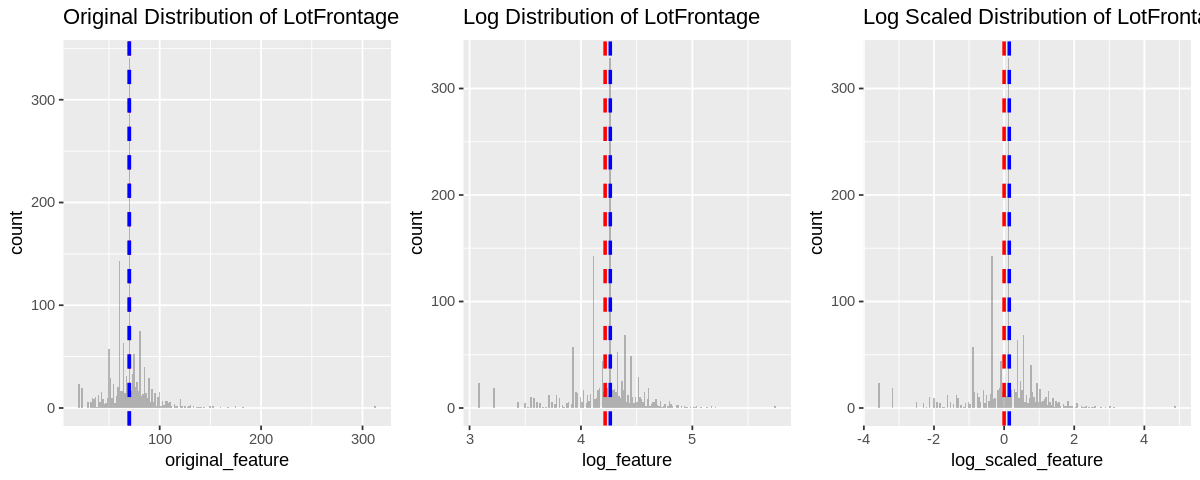

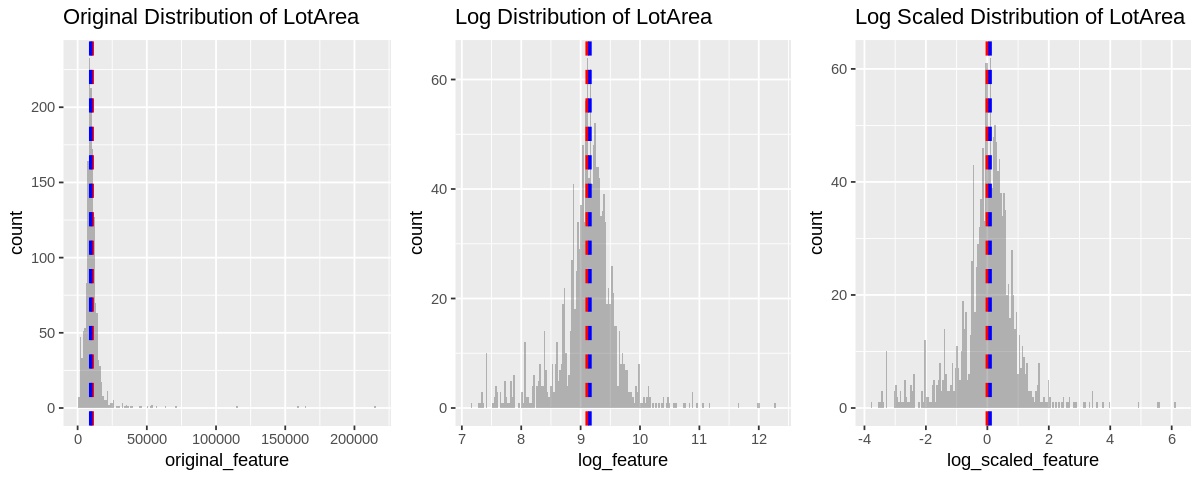

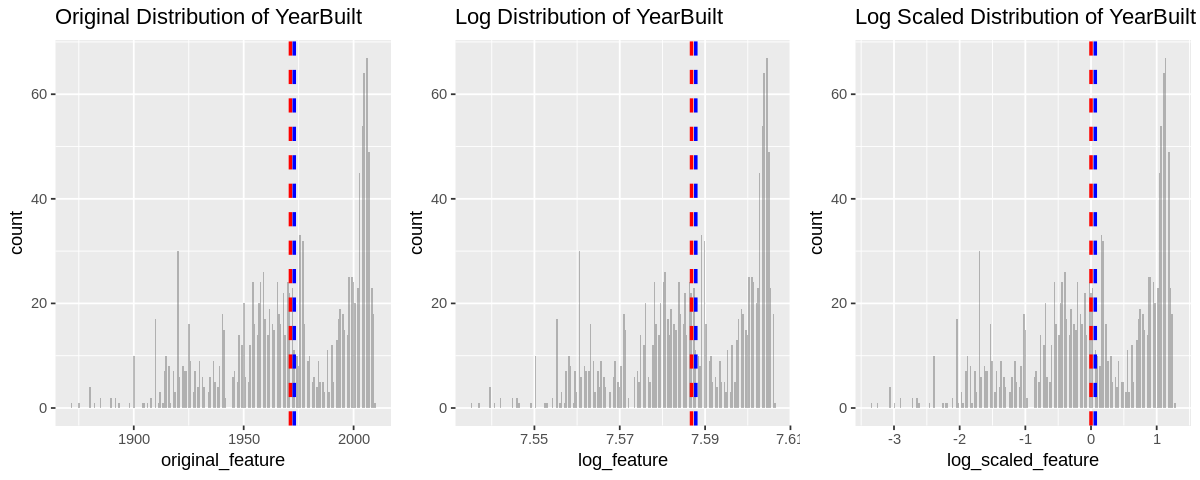

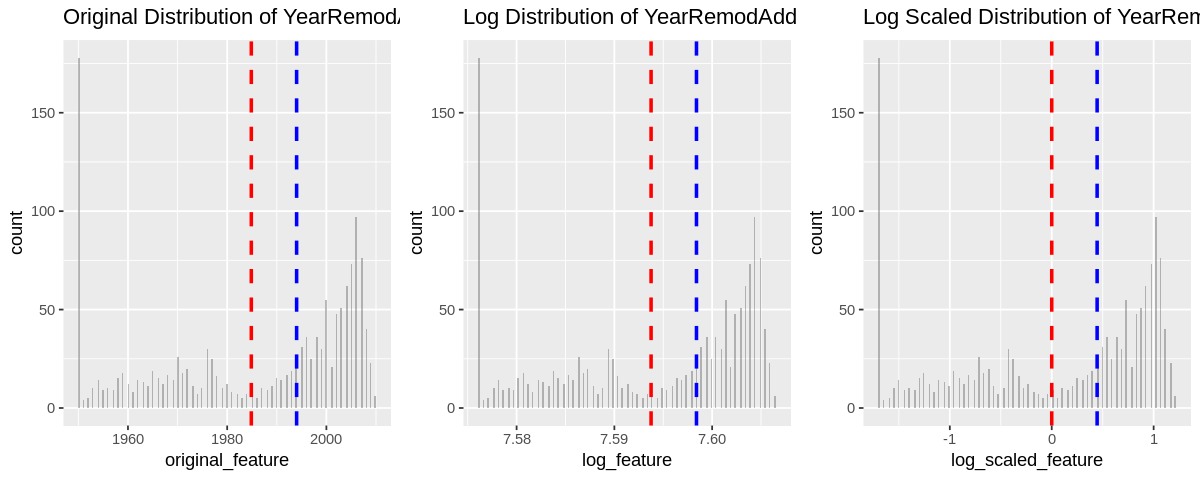

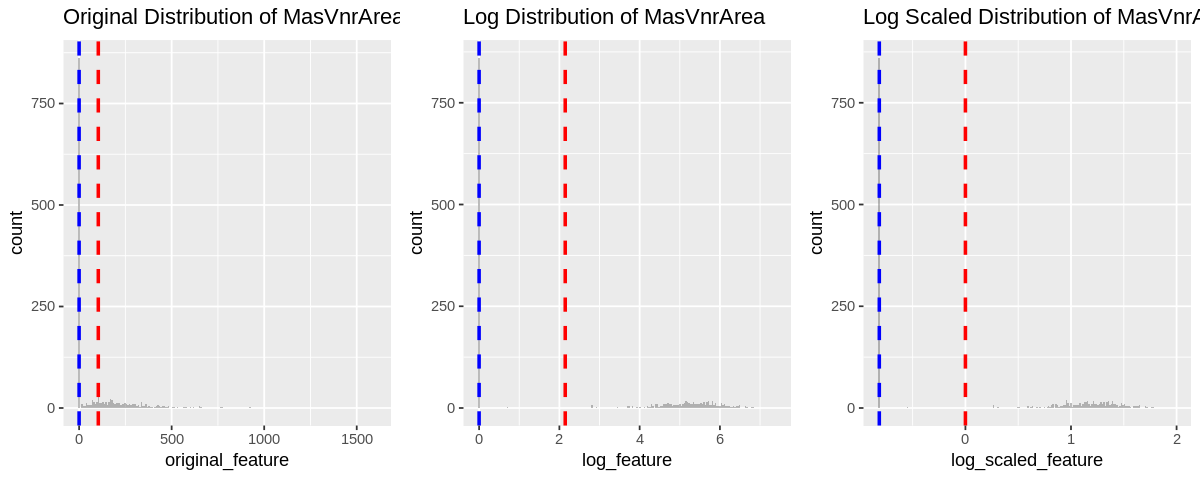

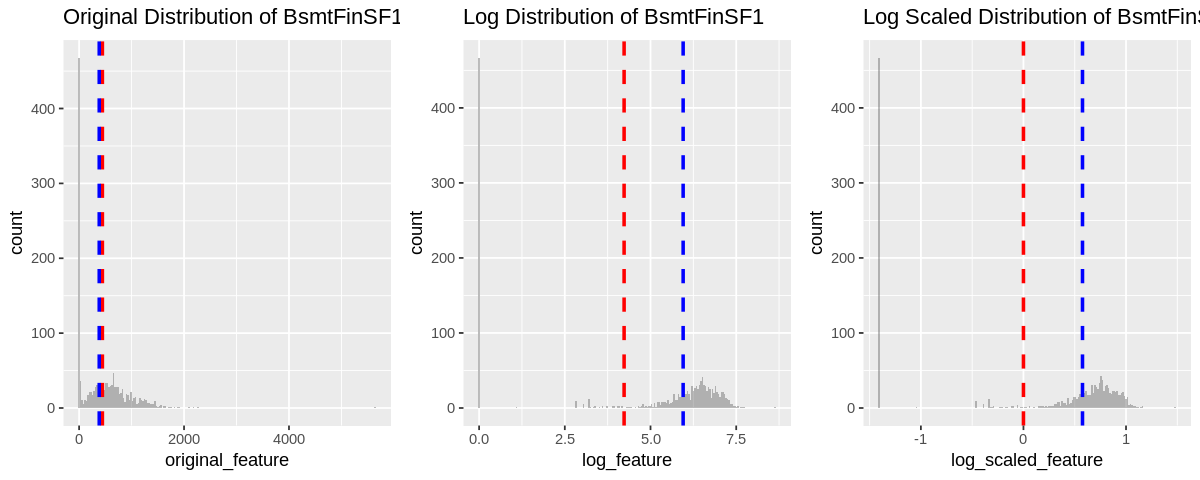

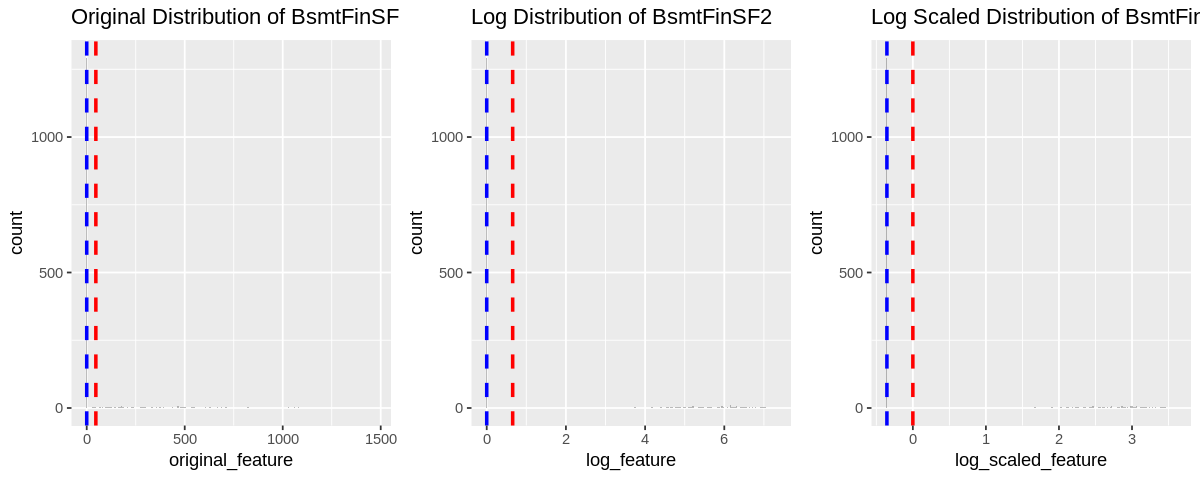

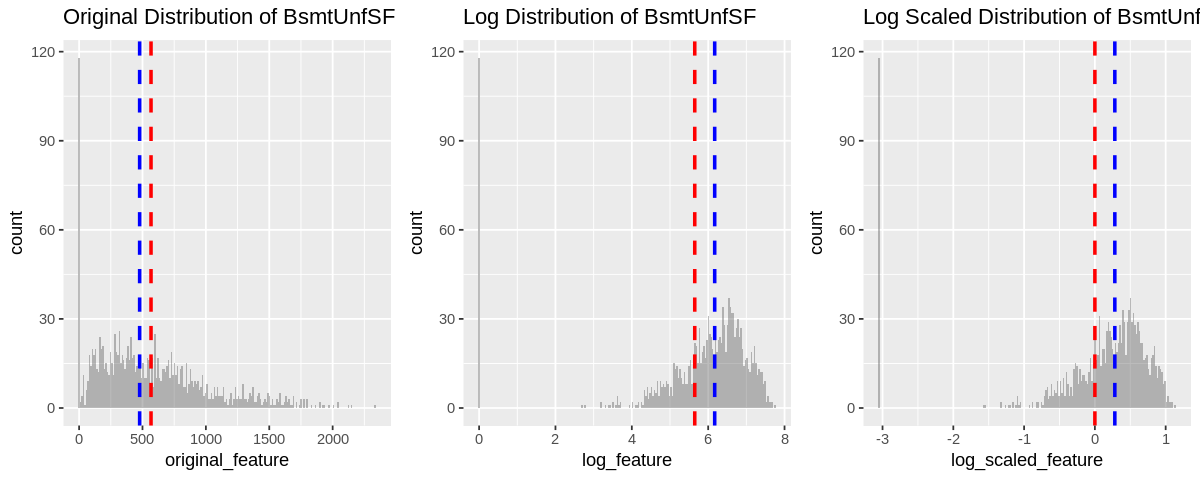

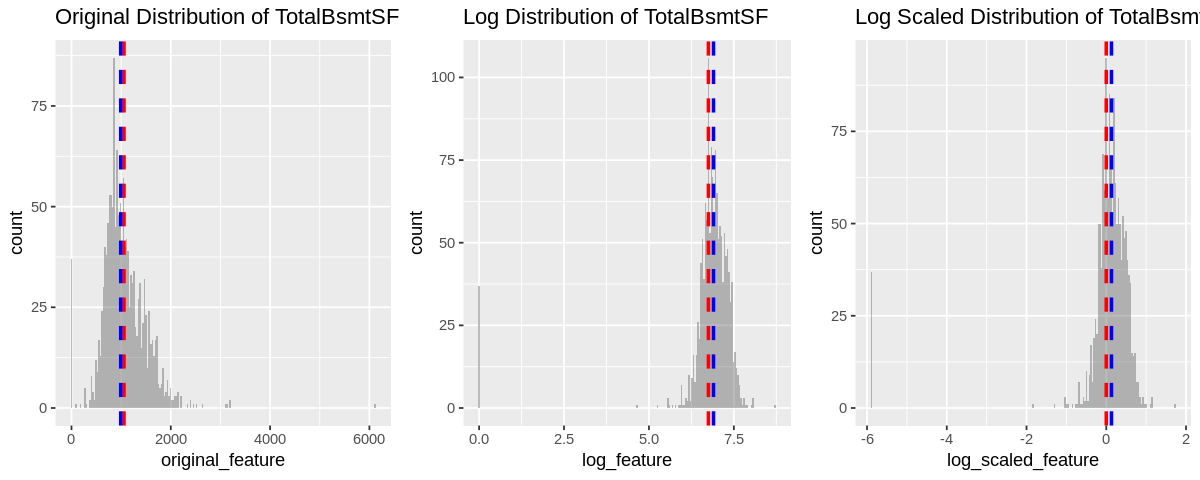

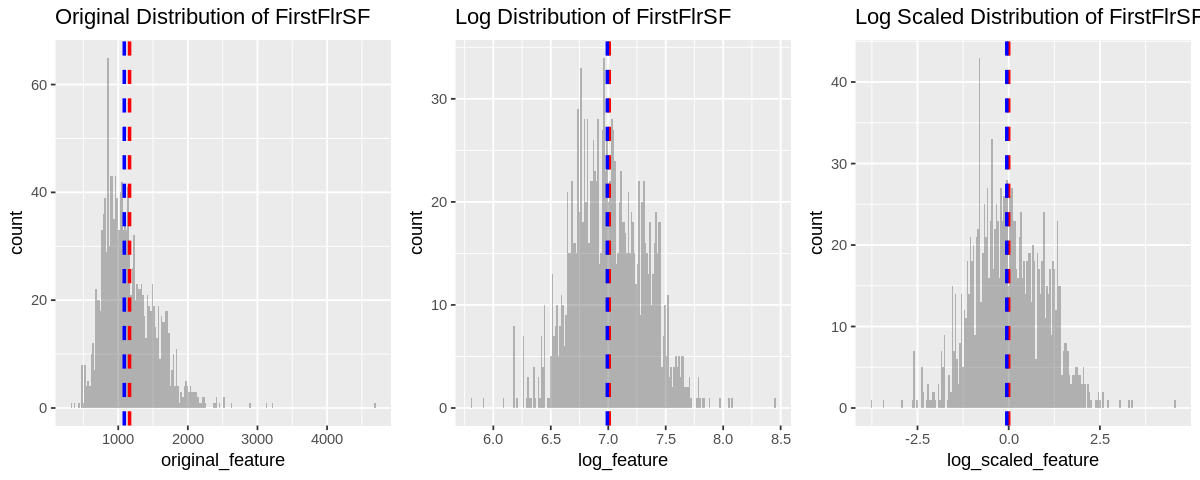

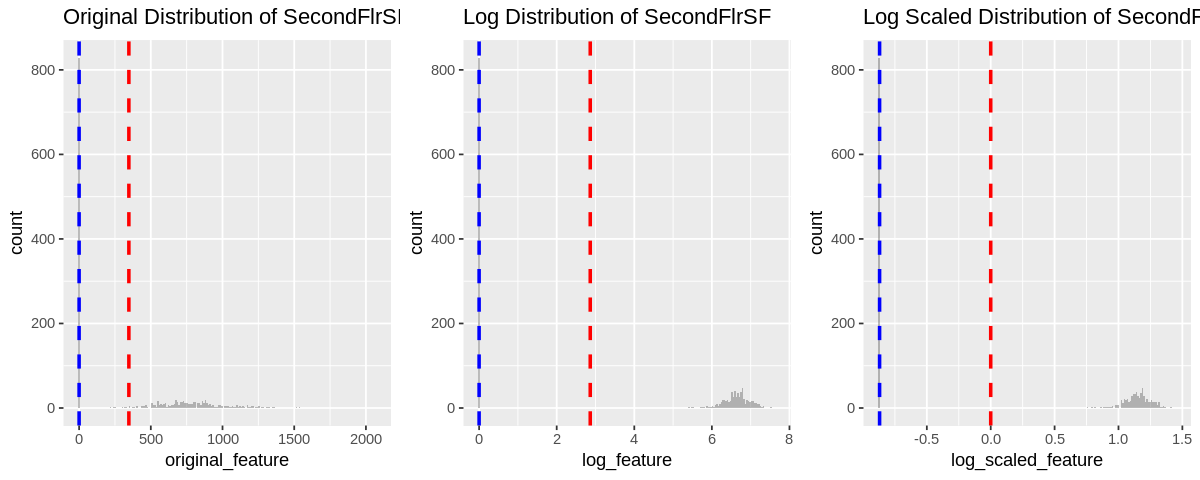

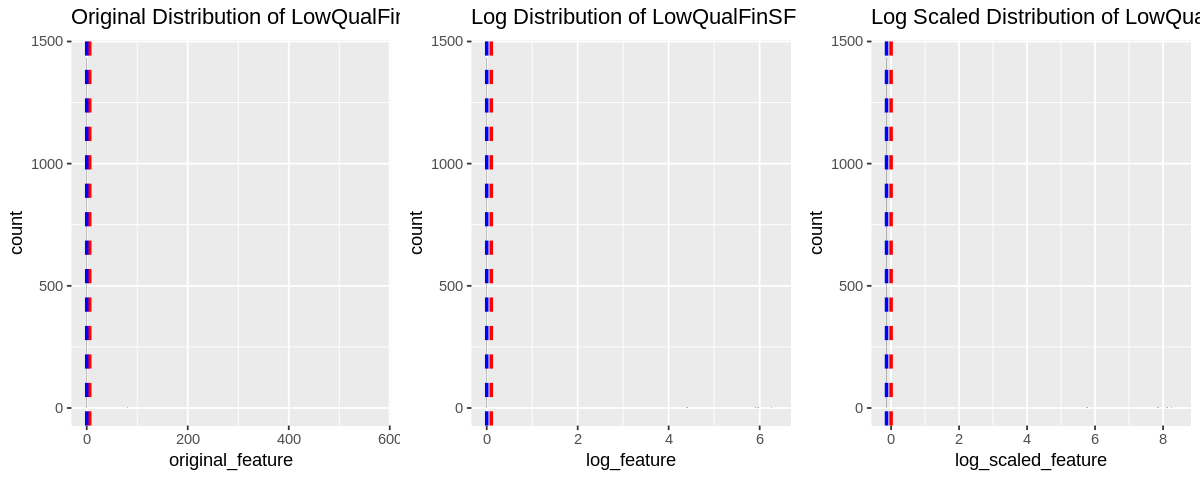

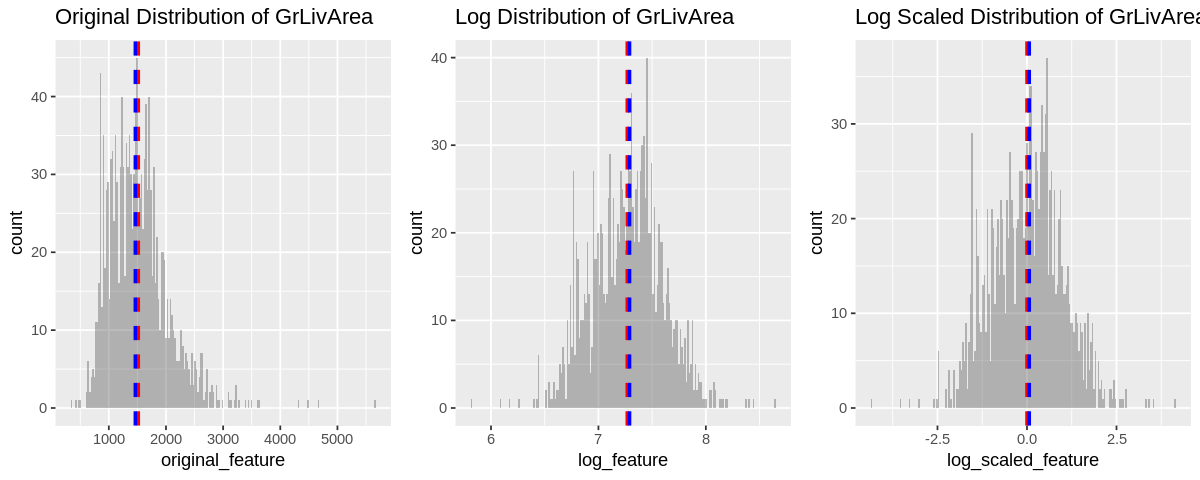

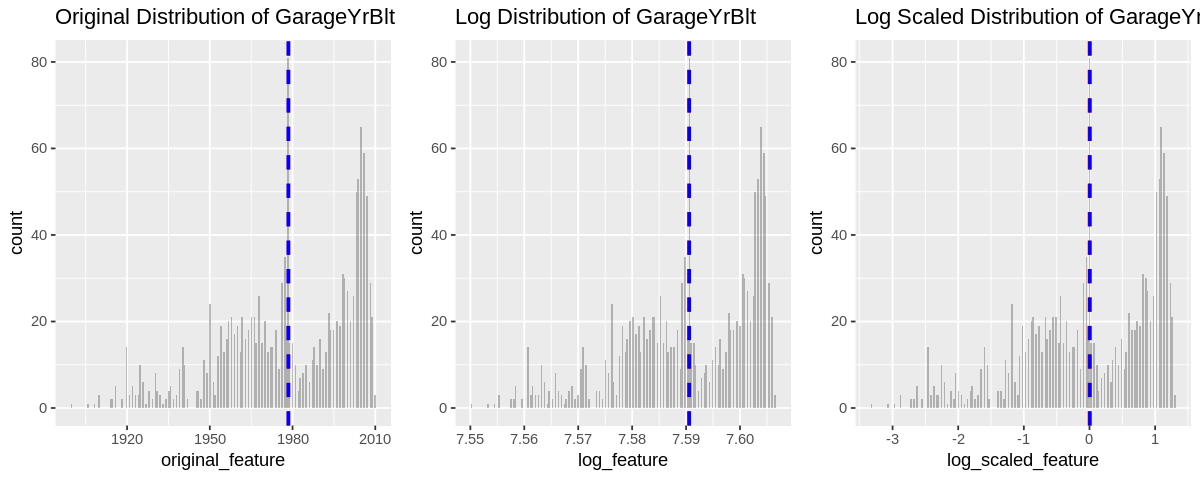

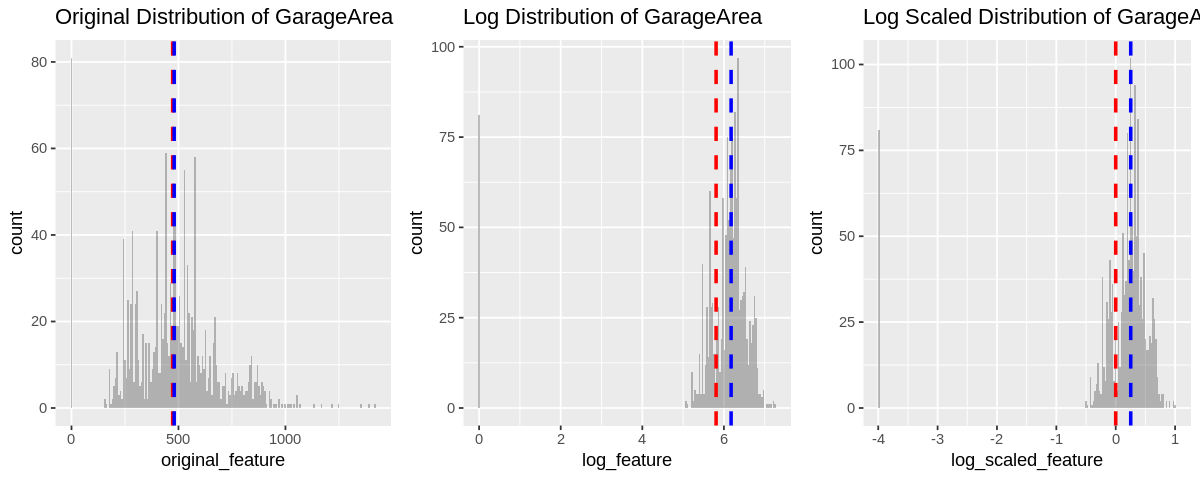

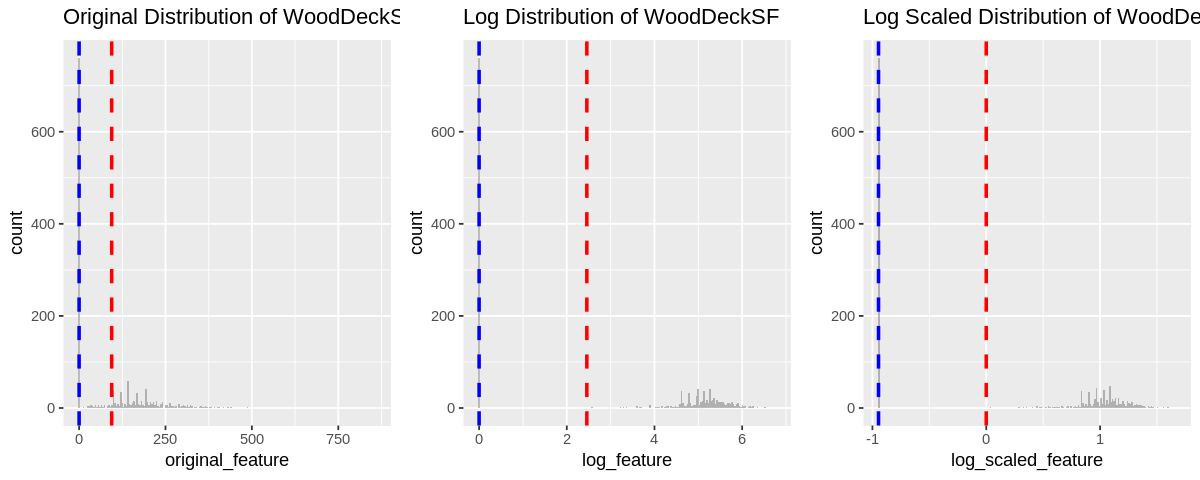

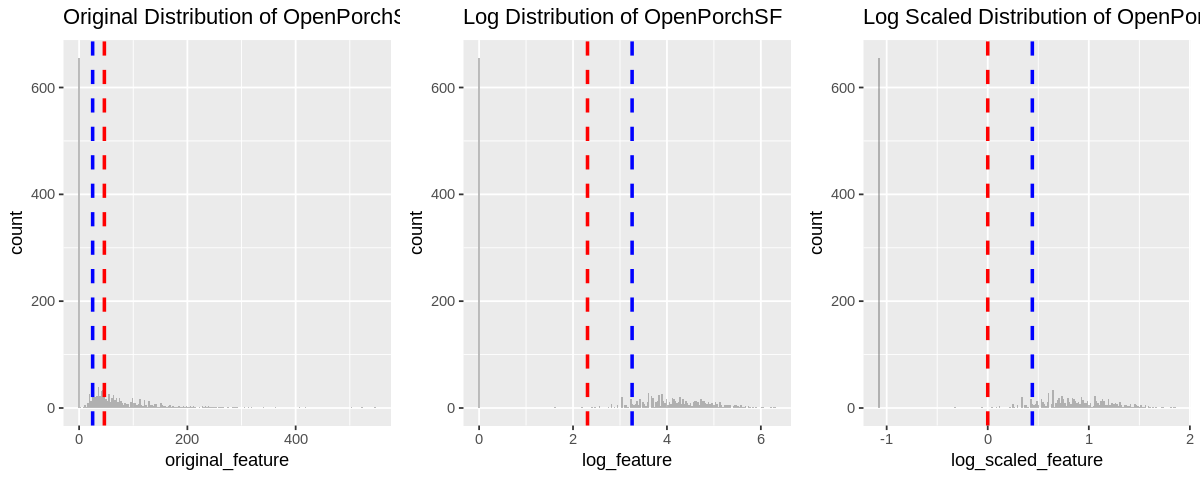

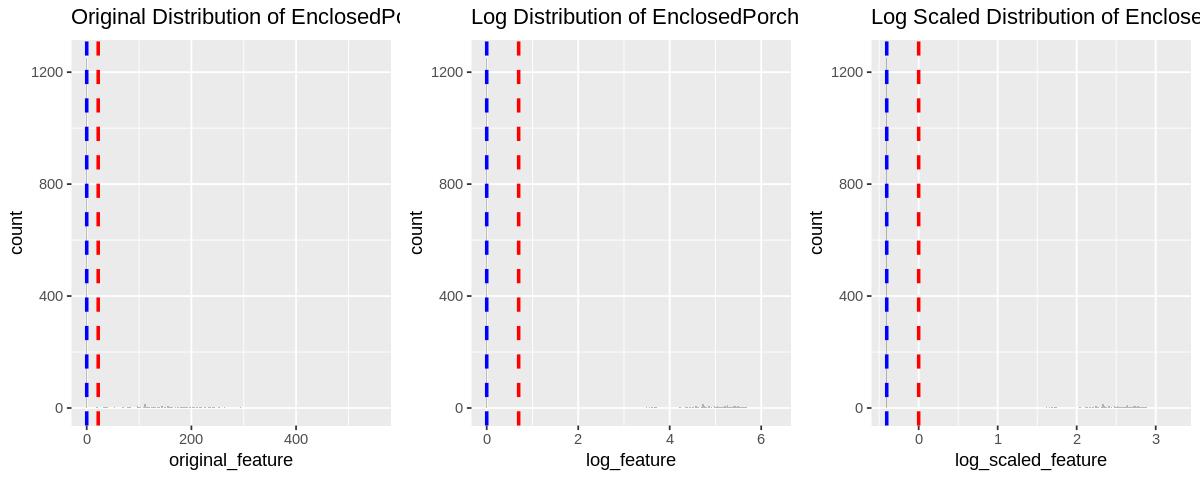

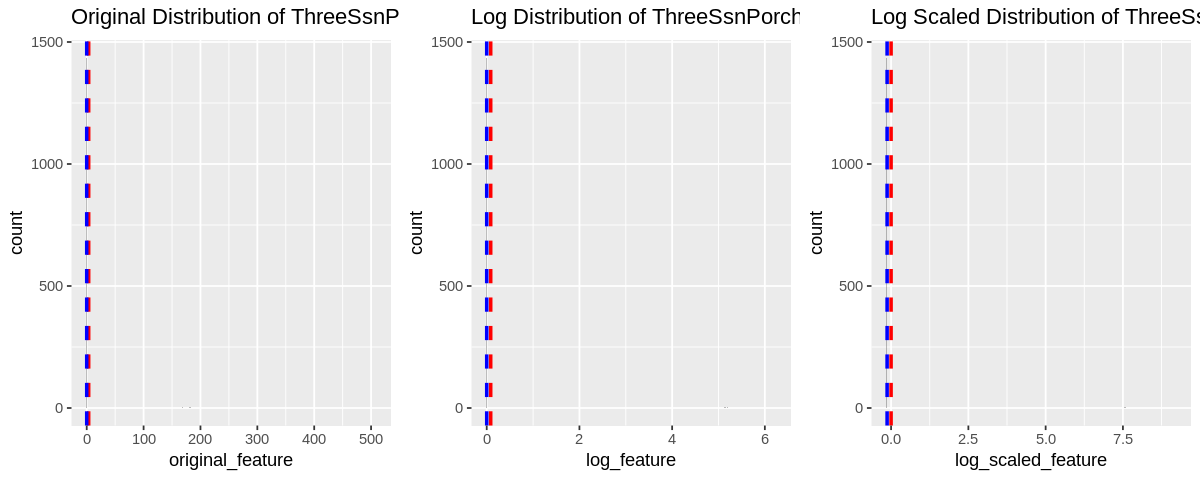

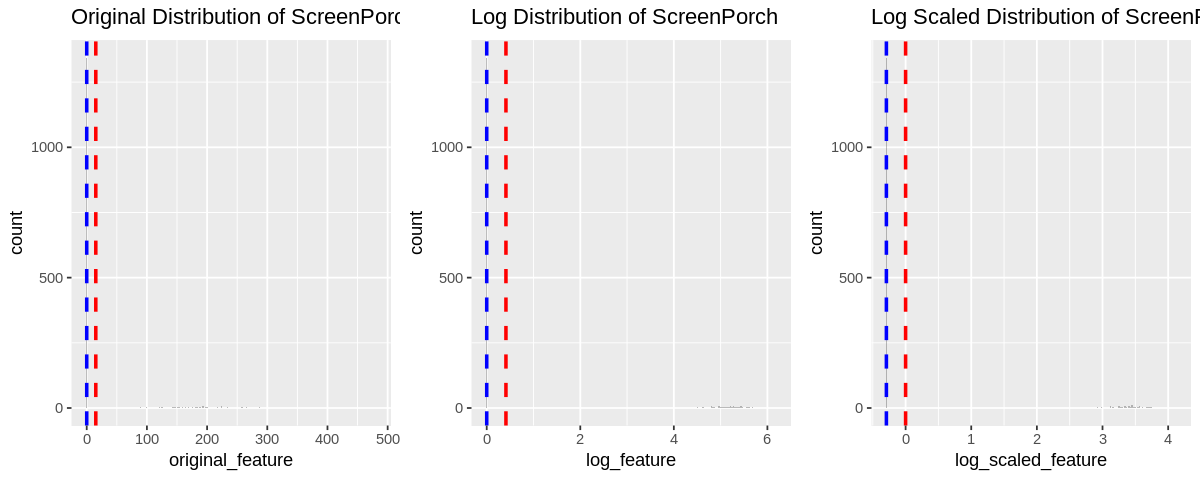

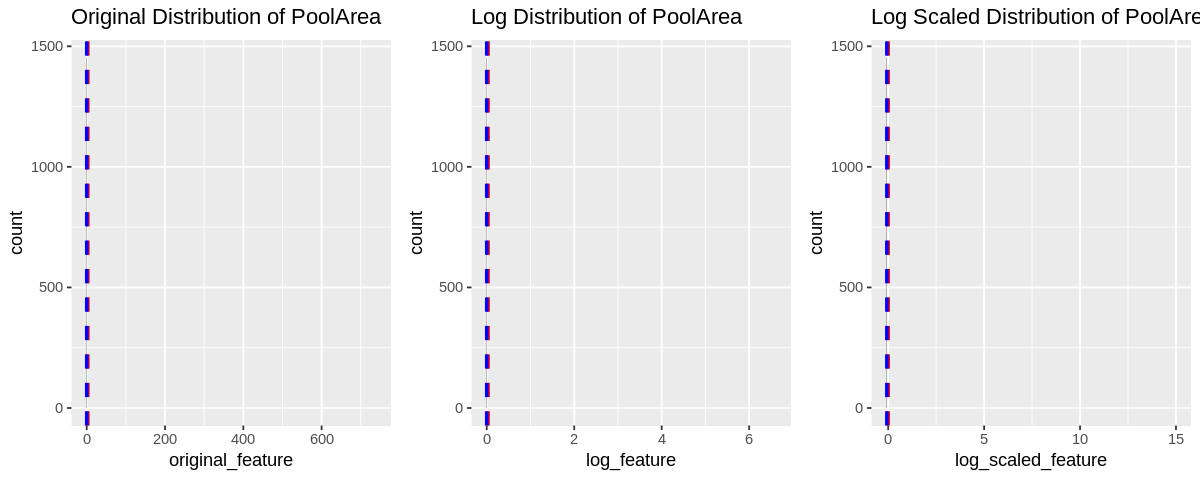

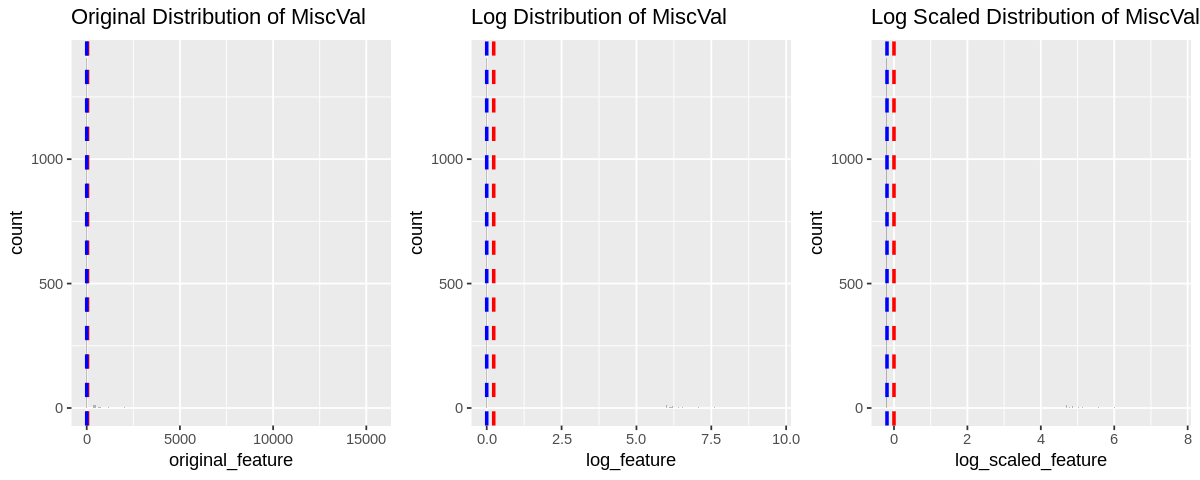

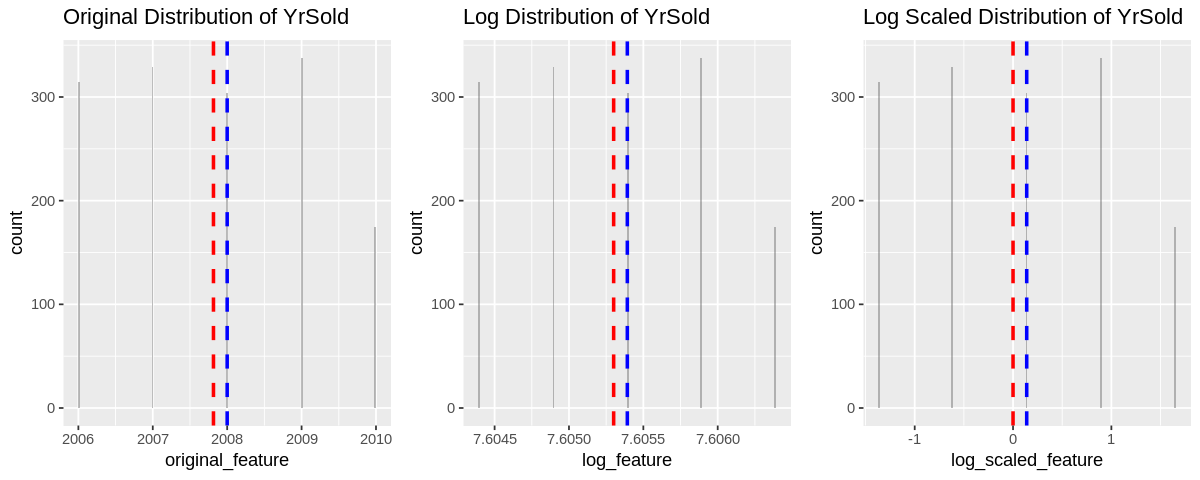

In [15]:
library(repr)
options(repr.plot.width=10, repr.plot.height=4) 

plot_transformation <- function (feature) {
    original_feature <- as.vector(numeric_features_df[[feature]])
    log_feature <- as.vector(numeric_log_df[[feature]])
    log_scaled_feature <- as.vector(numeric_log_sc_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))   
    p2 <- qplot(log_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Log Distribution of", feature))
    p3 <- qplot(log_scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Log Scaled Distribution of", feature))  
    multiplot(p1, p2, p3, cols=3)
}

for (feature in numeric_features_names) {
    plot_transformation(feature)
}



**Log transformation reduces the skew, and scaling makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance.**

- FirstFlrSF (First Floow Sq Ft.): 
    - we can see that the original distribution is skewed to the right (long tail on the right). 
    - Log distribution shows that it is not skewed anymore
    - Scale distribution, shows the mean at 0, and that except for the scale change the distribution remained the same.
    
- GrLiveArea (Ground Livig Area)
    - we can see that the original distribution is skewed sligntly to the right (small tail on the right). 
    - Log distribution shows that the distribution has been evened out. Also, the mean (red line) moved to the left of the median (blue line).
    - Scale distribution, shows the mean at 0, and scale changed from log scale to standard scale.

- TotalBsmtSF (Total Basement Sq Ft)
    - we can see that the original distribution is skewed to the right (shows a long tail on the right). 
    - Log distribution shows that the distribution has been evened out. Also, the mean (red line) moved to the left of the median (blue line), because we have a good number of houses that don't have any basement
    - Scale distribution, shows the mean at 0, and scale changed from log scale to standard scale.

### One Hot Encode Categorical Features

In [16]:
install.packages("onehot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [17]:
library("onehot")

In [18]:
categorical_features_df = Filter(is.factor, features_df)
head(categorical_features_df)

MSSubClass,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,⋯,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
60,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,⋯,2,TA,TA,Y,No Pool,No Fence,None,2,WD,Normal
20,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,⋯,2,TA,TA,Y,No Pool,No Fence,None,5,WD,Normal
60,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,⋯,2,TA,TA,Y,No Pool,No Fence,None,9,WD,Normal
70,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,⋯,3,TA,TA,Y,No Pool,No Fence,None,2,WD,Abnorml
60,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,⋯,3,TA,TA,Y,No Pool,No Fence,None,12,WD,Normal
50,RL,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,⋯,2,TA,TA,Y,No Pool,MnPrv,Shed,10,WD,Normal


In [19]:
dim(categorical_features_df)

[1] 1460   56

In [20]:
one_hot_encoding = onehot(categorical_features_df, stringsAsFactors = FALSE, addNA = FALSE, max_levels = 25) 
encoded_features <- predict(one_hot_encoding, categorical_features_df)
colnames(encoded_features)

[1] "MSSubClass=20"            "MSSubClass=30"           
  [3] "MSSubClass=40"            "MSSubClass=45"           
  [5] "MSSubClass=50"            "MSSubClass=60"           
  [7] "MSSubClass=70"            "MSSubClass=75"           
  [9] "MSSubClass=80"            "MSSubClass=85"           
 [11] "MSSubClass=90"            "MSSubClass=120"          
 [13] "MSSubClass=160"           "MSSubClass=180"          
 [15] "MSSubClass=190"           "MSZoning=C (all)"        
 [17] "MSZoning=FV"              "MSZoning=RH"             
 [19] "MSZoning=RL"              "MSZoning=RM"             
 [21] "LotShape=IR1"             "LotShape=IR2"            
 [23] "LotShape=IR3"             "LotShape=Reg"            
 [25] "LandContour=Bnk"          "LandContour=HLS"         
 [27] "LandContour=Low"          "LandContour=Lvl"         
 [29] "Utilities=AllPub"         "Utilities=NoSeWa"        
 [31] "LotConfig=Corner"         "LotConfig=CulDSac"       
 [33] "LotConfig=FR2"            "LotConfig=FR3"           
 [35] "LotConfig=Inside"         "LandSlope=Gtl"           
 [37] "LandSlope=Mod"            "LandSlope=Sev"           
 [39] "Neighborhood=Blmngtn"     "Neighborhood=Blueste"    
 [41] "Neighborhood=BrDale"      "Neighborhood=BrkSide"    
 [43] "Neighborhood=ClearCr"     "Neighborhood=CollgCr"    
 [45] "Neighborhood=Crawfor"     "Neighborhood=Edwards"    
 [47] "Neighborhood=Gilbert"     "Neighborhood=IDOTRR"     
 [49] "Neighborhood=MeadowV"     "Neighborhood=Mitchel"    
 [51] "Neighborhood=NAmes"       "Neighborhood=NoRidge"    
 [53] "Neighborhood=NPkVill"     "Neighborhood=NridgHt"    
 [55] "Neighborhood=NWAmes"      "Neighborhood=OldTown"    
 [57] "Neighborhood=Sawyer"      "Neighborhood=SawyerW"    
 [59] "Neighborhood=Somerst"     "Neighborhood=StoneBr"    
 [61] "Neighborhood=SWISU"       "Neighborhood=Timber"     
 [63] "Neighborhood=Veenker"     "Condition1=Artery"       
 [65] "Condition1=Feedr"         "Condition1=Norm"         
 [67] "Condition1=PosA"          "Condition1=PosN"         
 [69] "Condition1=RRAe"          "Condition1=RRAn"         
 [71] "Condition1=RRNe"          "Condition1=RRNn"         
 [73] "Condition2=Artery"        "Condition2=Feedr"        
 [75] "Condition2=Norm"          "Condition2=PosA"         
 [77] "Condition2=PosN"          "Condition2=RRAe"         
 [79] "Condition2=RRAn"          "Condition2=RRNn"         
 [81] "BldgType=1Fam"            "BldgType=2fmCon"         
 [83] "BldgType=Duplex"          "BldgType=Twnhs"          
 [85] "BldgType=TwnhsE"          "HouseStyle=1.5Fin"       
 [87] "HouseStyle=1.5Unf"        "HouseStyle=1Story"       
 [89] "HouseStyle=2.5Fin"        "HouseStyle=2.5Unf"       
 [91] "HouseStyle=2Story"        "HouseStyle=SFoyer"       
 [93] "HouseStyle=SLvl"          "Street=Grvl"             
 [95] "Street=Pave"              "Alley="                  
 [97] "Alley=Grvl"               "Alley=Pave"              
 [99] "Alley=No alley access"    "OverallQual=1"           
[101] "OverallQual=2"            "OverallQual=3"           
[103] "OverallQual=4"            "OverallQual=5"           
[105] "OverallQual=6"            "OverallQual=7"           
[107] "OverallQual=8"            "OverallQual=9"           
[109] "OverallQual=10"           "OverallCond=1"           
[111] "OverallCond=2"            "OverallCond=3"           
[113] "OverallCond=4"            "OverallCond=5"           
[115] "OverallCond=6"            "OverallCond=7"           
[117] "OverallCond=8"            "OverallCond=9"           
[119] "RoofStyle=Flat"           "RoofStyle=Gable"         
[121] "RoofStyle=Gambrel"        "RoofStyle=Hip"           
[123] "RoofStyle=Mansard"        "RoofStyle=Shed"          
[125] "RoofMatl=ClyTile"         "RoofMatl=CompShg"        
[127] "RoofMatl=Membran"         "RoofMatl=Metal"          
[129] "RoofMatl=Roll"            "RoofMatl=Tar&Grv"        
[131] "RoofMatl=WdShake"         "RoofMatl=WdShngl"        
[133] "Exterior1st=AsbShng"      "Exterior